# Logistic Regression

In [1]:
#needed to work!
available_graphics_toolkits
graphics_toolkit('gnuplot')

ans = 
{
  [1,1] = gnuplot
}


In [2]:
clear ; close all; clc
warning ("off", "Octave:broadcast");
warning ("off", "Octave:possible-matlab-short-circuit-operator");
warning ("off", "Octave:divide-by-zero");

### Loading Data

In [3]:
data = load('data/ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

## Ploting Data

In [4]:
%plot -f svg

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


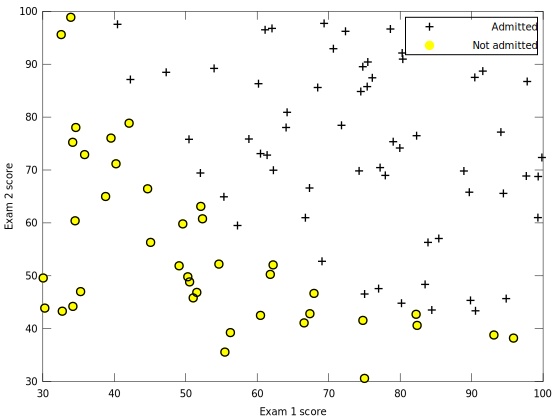

In [5]:
fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score');
ylabel('Exam 2 score');

% Specified in plot order
legend('Admitted', 'Not admitted');
hold off;

### Compute the Gradient

In [6]:
%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost); 
fprintf('Gradient at initial theta (zeros): \n'); 
fprintf(' %f \n', grad);

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 


### Using Fminunc to Optimize

Cost at theta found by fminunc: 0.203498
theta: 
 -25.161272 
 0.206233 
 0.201470 


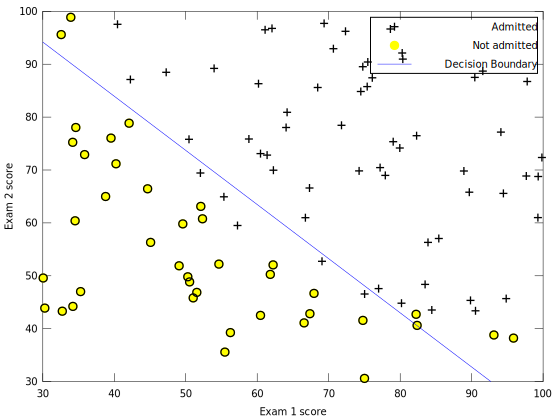

In [7]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
%[theta, cost] = fminunc(@(t)costFunction(t, X, y), initial_theta, options);

[theta, cost] = fminunc(@(t)costFunction(t, X, y), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf(' %f \n', theta);

% Plot Boundary
plotDecisionBoundary_1(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

## Prediction and Accuracies

In [8]:
%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n\n'], prob);

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

For a student with scores 45 and 85, we predict an admission probability of 0.776289

Train Accuracy: 89.000000


## With Regularization

### Loading Data

In [9]:
data = load('data/ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

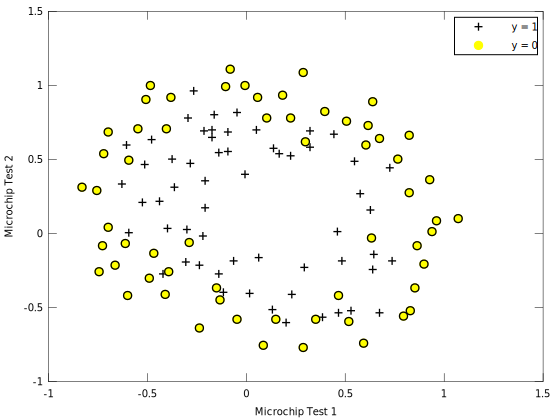

In [10]:
plotData(X, y);

% Put some labels 
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

## Regularized Logistic Regression

In [11]:
% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);

Cost at initial theta (zeros): 0.693147


## Regularization and Accuracies

In [ ]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
%lambda = 1;
lambdas = [0, 1, 10, 100];
%"blue", "black", "cyan", "green", "magenta", "red", "white", and "yellow". 

for i=1:length(lambdas)

    lambda = lambdas(i);
    color = i;
    
    

    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 400);

    % Optimize
    [theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
    
    % Plot Boundary
    
    plotDecisionBoundary_2(theta, X, y );
    
    title(sprintf('lambda = %g', lambda))

    % Labels and Legend
    xlabel('Microchip Test 1')
    ylabel('Microchip Test 2')

    legend('y = 1', 'y = 0', 'Decision boundary')
    
end

% Compute accuracy on our training set
p = predict(theta, X);